In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("S:/ML/Datasets/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.svm import SVC
model=SVC(C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



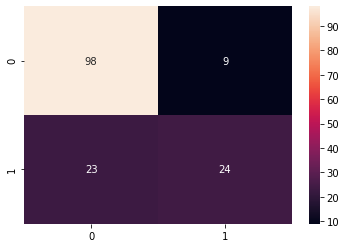

In [7]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

###  SVM Hyper parameter tuning

In [8]:
#model
model=SVC()
#parameters
kernel=['linear','poly','rbf','sigmoid']
C=[1,0.1,0.01,0.001]
#grid
grid=dict(kernel=kernel,C=C)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
#result
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'kernel': 'linear'}
0.7540761473188503


In [9]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



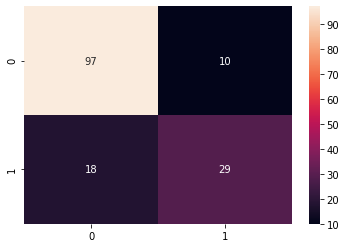

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))